# Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = [16, 10]

# Loading the data

In [53]:
df = pd.read_csv('Train.csv')
df.shape

(2822, 63)

In [54]:
df.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

# Cleaning data

In [62]:
df.isnull().sum()
#seems to have no na values
df.fillna(0)
df.drop_duplicates(keep = "first")

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,34503001: Ward 1,3261.68067,11551.56486,6.393480,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,...,0.000472,0.000472,0.000000,0.006203,0,0,ZA3453001,-27.675590,23.057920,9.118927
2818,34503002: Ward 2,1463.06432,7908.90411,15.668000,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,...,0.003030,0.000713,0.000000,0.008414,0,0,ZA3453002,-27.591408,22.907161,1.697395
2819,34503003: Ward 3,1395.18881,6242.37527,13.238795,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,...,0.002150,0.001458,0.000000,0.003670,0,0,ZA3453003,-27.952550,22.749698,2.792501
2820,34503004: Ward 4,1679.66964,8014.73089,17.639523,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,...,0.009235,0.007870,0.000000,0.004803,0,0,ZA3453004,-27.913875,22.755314,2.793699


In [63]:
#removing columns that are redundant or don't have useful information to us
#unspecified and N/A are pretty much the same for our purposes
df = df.drop(["pw_07", "pw_08","dw_00","dw_11", "psa_02", "psa_04", "lan_14"], axis = 1)

# Correlations

positive correlations

In [68]:
pos = pd.DataFrame(df.corr()['target'].sort_values(ascending=False))
pos = pos[pos['target'] > 0.7]
#school attendance
#no car
#no satelite TV
pos_indices = pos.index
pos_indices

Index(['target', 'psa_00', 'car_01'], dtype='object')

negative correlations 

In [69]:
neg =pd.DataFrame(df.corr()['target'].sort_values())
neg = neg[neg['target'] < -0.7]
#indoor water access
#school attendence: no
#car: no
neg_indices = neg.index
neg_indices

Index(['pw_00', 'psa_01', 'car_00'], dtype='object')

In [58]:
correlated = df[['target', 'psa_00', 'car_01', 'pw_00', 'psa_01', 'car_00']]
correlated

,target,psa_00,car_01,pw_00,psa_01,car_00
0,16.773757,0.260191,0.726273,0.742692,0.607898,0.273727
1,21.496661,0.290228,0.855362,0.309294,0.549788,0.144638
2,10.931425,0.186435,0.727780,0.323393,0.677005,0.272220
3,23.119257,0.281229,0.872125,0.677437,0.593281,0.127875
4,13.652252,0.196687,0.595493,0.771106,0.517578,0.404507
...,...,...,...,...,...,...
2817,6.393480,0.249796,0.204324,0.918325,0.548069,0.795676
2818,15.668000,0.243611,0.706102,0.426518,0.597921,0.293898
2819,13.238795,0.253504,0.602848,0.619392,0.567502,0.397152
2820,17.639523,0.272915,0.721146,0.567853,0.551838,0.278854


# Spliting/Fit/Predict  -- Linear Regression + metrics

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [50]:
# #for all the numerical columns 
# X = df.drop(columns = ['target', 'ward', 'ADM4_PCODE'] )
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.25, random_state = 42)

# model = LinearRegression()
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)

# X = X_test.reset_index().copy() # make a copy of indices and data
# X["target"] = y_test.tolist()
# X["prediction"] = predictions
# X

,index,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL,target,prediction
0,1091,1866.23138,7326.74439,0.510203,0.312948,0.079501,0.001186,0.000000,0.001378,0.006144,...,0.019997,0.001985,0.062959,0,0,-30.118707,29.282388,0.000000,15.867901,24.945375
1,2510,3011.80828,11531.75832,0.701485,0.046439,0.009159,0.002819,0.000000,0.011571,0.005189,...,0.029294,0.016458,0.146579,0,0,-26.078382,25.839042,15.773764,14.744632,18.457611
2,1474,9346.73735,39175.99195,0.705361,0.091124,0.002353,0.003708,0.001636,0.011389,0.010406,...,0.024142,0.003813,0.079092,0,0,-29.970421,30.840556,35.747076,25.767571,22.886782
3,1437,6846.22121,30924.03809,0.901071,0.008494,0.002448,0.001656,0.005862,0.000348,0.043820,...,0.000598,0.000611,0.012393,0,0,-29.730505,30.978227,54.992047,27.705788,24.964568
4,1105,2537.75340,11645.69910,0.171127,0.801225,0.009654,0.000000,0.000403,0.000000,0.007691,...,0.040369,0.014663,0.406589,0,0,-30.311653,30.308249,3.922369,42.524363,36.408425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1718,1590.30812,6477.36182,0.923208,0.012366,0.000733,0.001294,0.000000,0.000733,0.054475,...,0.067955,0.050464,0.339899,0,0,-22.922548,28.831292,1.523924,35.258470,38.268978
702,964,2677.15890,13676.59656,0.722905,0.199292,0.058445,0.001168,0.001168,0.000000,0.006020,...,0.011512,0.040208,0.211420,0,0,-27.479312,32.182500,0.808811,35.530514,35.158223
703,2413,2836.03133,7286.03774,0.274689,0.003302,0.003015,0.000585,0.001169,0.000000,0.004851,...,0.025424,0.003220,0.004765,0,0,-24.982688,27.167481,10.431260,23.821987,17.347264
704,926,1774.81630,8866.67570,0.063996,0.904443,0.009448,0.001218,0.010769,0.003031,0.001620,...,0.037315,0.087179,0.817012,0,0,-30.064554,30.442466,0.991275,38.465831,41.674865


In [13]:
# #metrics: r2
# model_r2 = metrics.r2_score(y_test, predictions)
# model_r2

0.8598545036968227

In [66]:
#for the most correlated columns
X = correlated.drop(columns = "target")
y  = correlated['target']
# y is same as before: y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.25, random_state = 42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

X = X_test.reset_index().copy() # make a copy of indices and data
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,psa_00,car_01,pw_00,psa_01,car_00,target,prediction
0,1091,0.293419,0.847041,0.234088,0.530219,0.152959,15.867901,25.881502
1,2510,0.205524,0.828081,0.175511,0.631661,0.171919,14.744632,19.538489
2,1474,0.324971,0.765977,0.586941,0.503086,0.234023,25.767571,24.127768
3,1437,0.347064,0.858030,0.460577,0.506142,0.141970,27.705788,27.939237
4,1105,0.375997,0.891677,0.032147,0.450907,0.108323,42.524363,34.096204


In [67]:
model_r2 = metrics.r2_score(y_test, predictions)
model_r2

0.8138425094469832

# Splitting/Fit/Predict  -- Linear Regression Cross Validation + metrics

In [19]:
from sklearn.model_selection import cross_val_score

In [ ]:
def r2_cv(n):
    cv_scores = cross_val_score(
        estimator=model, 
        X = X,
        y = y,
        scoring = "r2", 
        cv = n,
    )
    print('cv =', n, ': ',cv_scores.mean())
for i in range(3, 16):
    r2_cv(i)
#cv = 5 seems to yield best r2 score, tho not as good as regular LR model

# Modeling

In [20]:
df_test = pd.read_csv('/Users/aliably/Desktop/iX GroupProj. Data/Test.csv')
df_test

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.000000,0.006649,0,0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.000000,0.002916,0,0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.000000,0.000000,0,0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.000000,0.001379,0,0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.000000,0.001660,0,0,ZA2101005,-32.251571,24.558537,8.601754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,19100107: Ward 107,16076.89903,43296.51372,0.668295,0.002827,0.207749,0.028813,0.069741,0.010701,0.003941,...,0.000392,0.000291,0.000148,0.002277,0,0,ZA1910107,-33.806524,18.496094,33.913055
1009,19100108: Ward 108,17470.24004,53538.12816,0.483111,0.000824,0.001189,0.000870,0.000554,0.000370,0.001954,...,0.030744,0.008313,0.000348,0.022417,0,0,ZA1910108,-33.982120,18.673308,60.009486
1010,19100109: Ward 109,9467.25336,40332.11708,0.579036,0.007184,0.066458,0.001003,0.000371,0.150977,0.007699,...,0.003850,0.000990,0.000352,0.010670,0,0,ZA1910109,-34.062704,18.767457,35.834860
1011,19100110: Ward 110,6111.31195,27793.92916,0.623537,0.002216,0.101188,0.001517,0.000939,0.158979,0.013516,...,0.000559,0.000000,0.000204,0.026741,0,0,ZA1910110,-34.057772,18.487893,50.153301


In [21]:
all_data = pd.concat([df, df_test], 0)

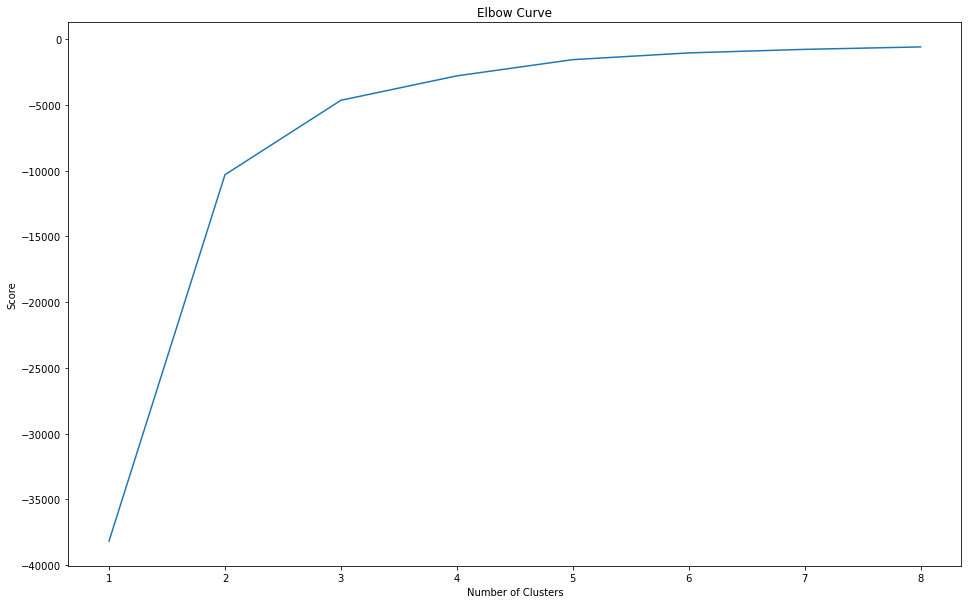

In [24]:
K_clusters = range(1,9)

#range is shifted from 0-4 to 1-5 to avoid infinity-type error

kmeans = [KMeans(n_clusters = i) for i in K_clusters]

Y_axis = all_data[['lat']]
X_axis = all_data[['lon']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualization

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#This Elbow Curve shows the optimal amount of clusters. After 5, the complexity plateaus, and adding additional 
    # clusters would be redundant. 

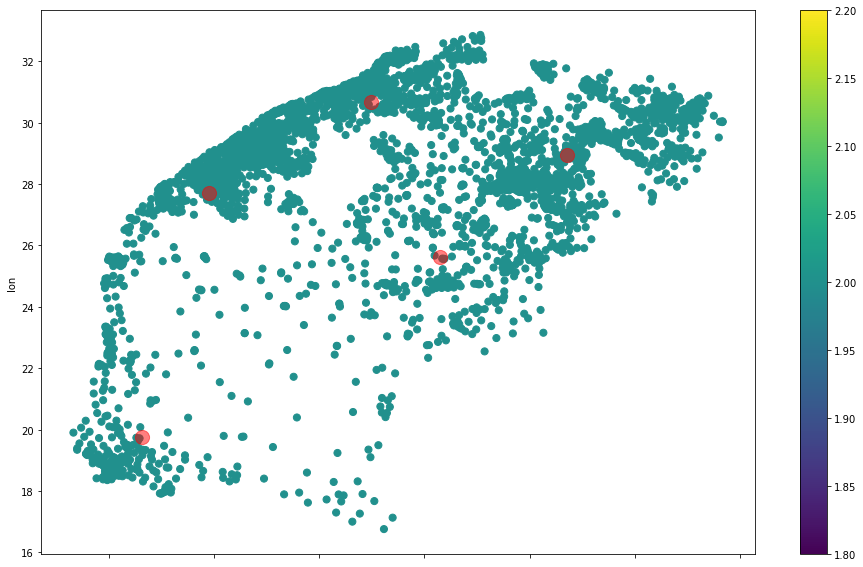

In [25]:
# Using geolocation, coordinates are organized into 5 clusters (0 - 4). These clusters allow for the examination
# of levels of poverty in relation to highly-correlating variables. 

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(all_data[['lat','lon']])
all_data['cluster_label'] = kmeans.fit_predict(all_data[['lat','lon']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(all_data[['lat','lat']])
# Full_data['cluster_label'].value_counts()
all_data.plot.scatter(x = 'lat', y = 'lon', c = labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [26]:
all_data['cluster_label'].value_counts()

1    1429
4     843
0     596
3     536
2     431
Name: cluster_label, dtype: int64

<AxesSubplot:>

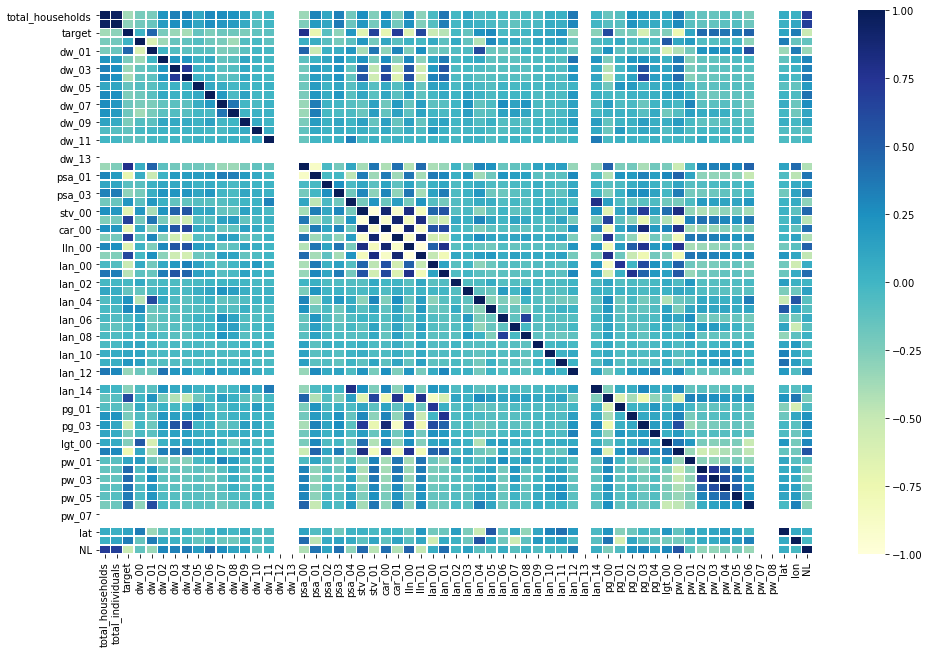

In [30]:
#training data correlations

corr = df.corr()

plt.figure(figsize = (16,10))
sns.heatmap(corr, cmap="YlGnBu", linewidths=.5)

In [31]:
ascending_correlation = abs(corr['target']).sort_values(ascending=False)
ascending_correlation

#This shows the most highly-correlating variables in an ascending order. 

target    1.000000
psa_00    0.782472
pw_00     0.754536
psa_01    0.707506
car_00    0.702831
            ...   
dw_12          NaN
dw_13          NaN
lan_13         NaN
pw_07          NaN
pw_08          NaN
Name: target, Length: 61, dtype: float64

In [37]:
ascending_correlation.fillna(0)

#Variables with a correlation of 0 can be dropped. 

target    1.000000
psa_00    0.782472
pw_00     0.754536
psa_01    0.707506
car_00    0.702831
            ...   
dw_12     0.000000
dw_13     0.000000
lan_13    0.000000
pw_07     0.000000
pw_08     0.000000
Name: target, Length: 61, dtype: float64

In [41]:
ascending_correlation.drop(['dw_12', 'dw_13', 'lan_13', 'pw_07', 'pw_08'])

#Now, only features with a significance greater than 0 are shown. 

target               1.000000
psa_00               0.782472
pw_00                0.754536
psa_01               0.707506
car_00               0.702831
car_01               0.702831
stv_01               0.664181
stv_00               0.664181
lln_00               0.637835
lln_01               0.637835
pg_00                0.613346
pg_03                0.583908
NL                   0.514398
lan_00               0.507942
pw_06                0.470676
dw_01                0.458206
pw_02                0.442441
pw_03                0.440941
lan_01               0.438704
pw_04                0.389467
dw_04                0.385533
total_households     0.374833
pw_05                0.349653
lon                  0.347088
dw_03                0.338137
lan_12               0.325367
psa_03               0.301572
total_individuals    0.293827
lan_14               0.287004
lan_05               0.275263
lgt_00               0.260286
dw_06                0.248573
dw_09                0.235331
pg_01     